In [1]:
import smtpd
import warnings
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
import scipy.stats.morestats
import matplotlib
from scipy.ndimage import gaussian_filter
from rsa_utils import *
import seaborn as sns
from metrics import *
from cebra_utils import *
from riab_utils import *
from dat import *
%matplotlib inline

In [2]:
sns.set(style='dark', font_scale=1.25)
p = r'/Users/jquinnlee/Desktop/georep_hipp'
os.chdir(p)

In [3]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']
animal = animals[2]

In [4]:
dat = load_dat(animal, os.path.join(p, "data"))

Loading preprocessed data for animal QLAK-CA1-50


##
## Figure 2B - 3x3 Partitioned rate map representational similarity matrix

In [4]:
# Calculate and save cell-wise, partition-wise rsm for all animals from rate map data
# for animal in animals:
#     dat = load_dat(animal)
#     rsm_parts, rsm_labels, rsm_cell_idx = get_cell_rsm_partitioned(dat[animal]['maps'], d_thresh=0)
#     rsm_dict = {'RSM': rsm_parts, 'd_labels': rsm_labels[:, 0], 'p_labels': rsm_labels[:, 1],
#                 'cell_idx': rsm_cell_idx, 'envs': dat[animal]['envs']}
#     joblib.dump(rsm_dict, os.path.join(p, "data", f'{animal}_rsm_partitioned'))
#     del dat


# # Combine averaged partition-wise RSM for all animals and sequences
rsm_parts_animals = get_rsm_partitioned_sequences(animals, agg=False, p=os.path.join(p, "data"))

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


In [5]:
# order partitioned rsms across animals
rsm_parts_ordered, rsm_parts_averaged = get_rsm_partitioned_similarity(rsm_parts_animals, animals,
                                                                       False, False)

In [6]:
def plot_rsm_parts_averaged(rsm_parts_averaged, vmax=1., vmin=-.1, cmap='inferno'):
    sns.set(style='dark', font_scale=2)
    rsm_copy = deepcopy(rsm_parts_averaged)
    nan_mask = ~np.isnan(rsm_copy[np.eye(rsm_copy.shape[0]).astype(bool)])
    rsm_copy = rsm_copy[nan_mask, :][:, nan_mask]
    np.fill_diagonal(rsm_copy, np.nan)
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot()
    mappable = ax.imshow(rsm_copy, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(mappable, shrink=.8)
    cbar.ax.set_title('R', weight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    plt.setp(ax.spines.values(), color='k', linewidth=4)
    plt.tight_layout()
    plt.show()
    return fig

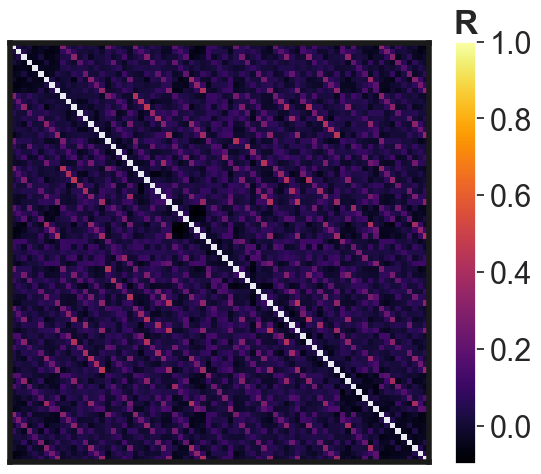

In [7]:
fig_b = plot_rsm_parts_averaged(rsm_parts_averaged)

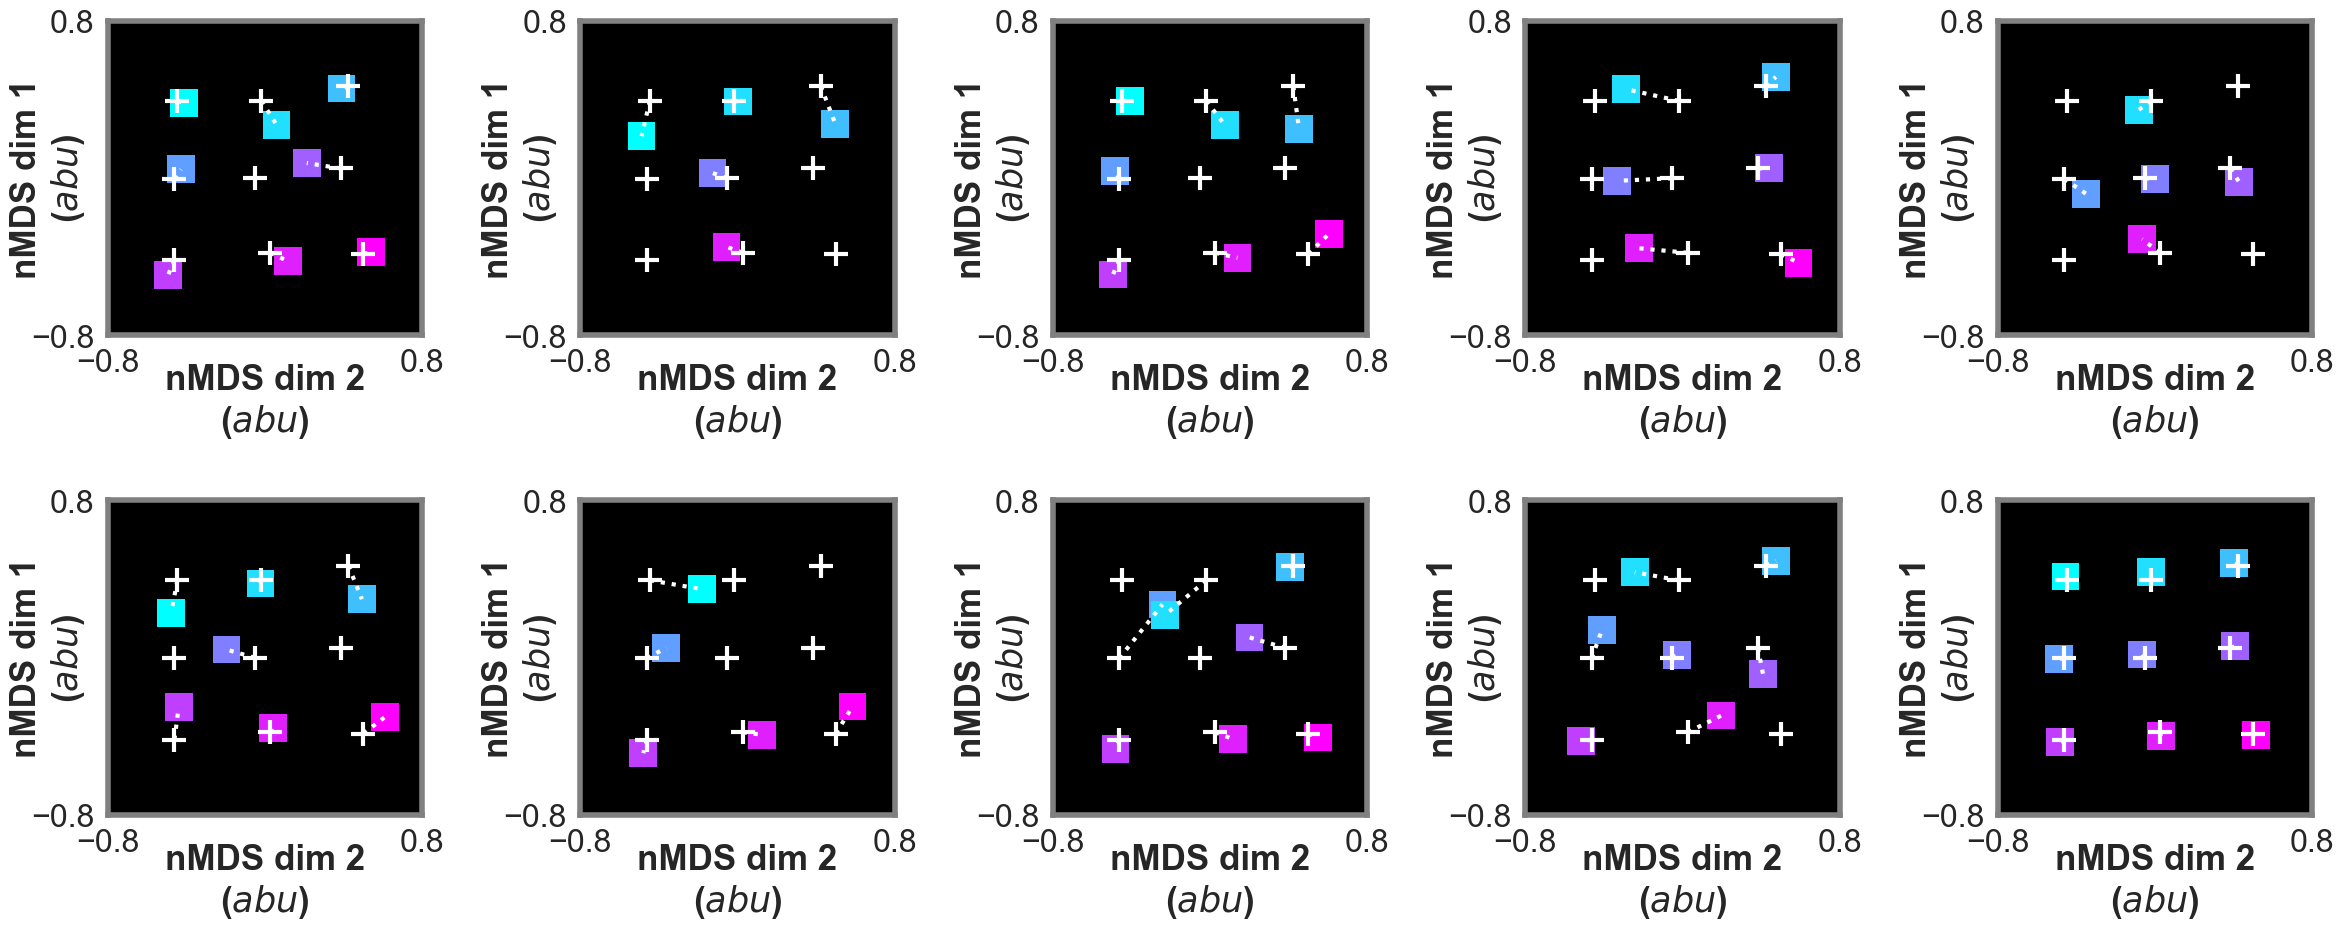

In [8]:
fig_c = plot_rsm_parts_mds(rsm_parts_averaged)

In [12]:
def plot_similarity_parts_matrix(animals, p):
    rsm_parts_animals = get_rsm_partitioned_sequences(animals, agg=False, p=os.path.join(p, "data"))
    rsm_parts_ordered, rsm_parts_averaged = get_rsm_partitioned_similarity(rsm_parts_animals, animals, False, False)

    labels = rsm_parts_animals['cannon_labels'][9:]

    fig = plt.figure(figsize=(12, 5))
    for i, e in enumerate(np.unique(labels[:, 0])):
        mask = labels[:, 0] == e
        sub_mat = rsm_parts_averaged[9:, :9][mask]
        sub_mat = sub_mat[np.eye(sub_mat.shape[0]).astype(bool)][np.newaxis].reshape(3,3)
        ax = plt.subplot(2, 5, i+1)
        ax.imshow(sub_mat.T, vmin=0., vmax=.45, cmap='plasma')
        ax.set_xticks([])
        ax.set_yticks([])
        plt.setp(ax.spines.values(), color='k', linewidth=4)
    plt.show()
    return fig

QLAK-CA1-08
QLAK-CA1-30
QLAK-CA1-50
QLAK-CA1-51
QLAK-CA1-56
QLAK-CA1-74
QLAK-CA1-75


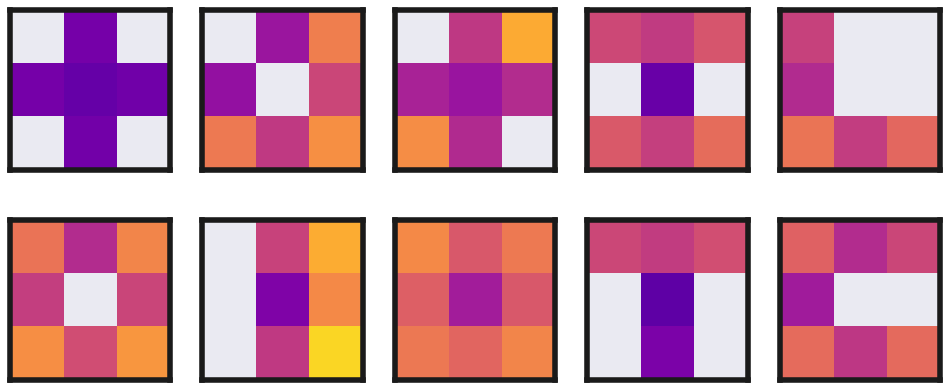

In [13]:
fig_d = plot_similarity_parts_matrix(animals, p)

In [36]:
def plot_rsm_parts_examples(rsm_parts_ordered, a1=1, a2=2, vmax=.6):
    target_rsms = np.array([[a1, 0], [a1, 1], [a1, 2], [a2, 0], [a2, 1], [a2, 2]])
    sns.set(style='dark', font_scale=2)
    fig = plt.figure(figsize=(16, 12))
    for i, (t_animal, t_sequence) in enumerate(target_rsms):
        ax = plt.subplot(target_rsms.shape[1], target_rsms.shape[0] // target_rsms.shape[1], i+1)

        rsm_copy = deepcopy(rsm_parts_ordered[t_sequence, t_animal])
        nan_mask = ~np.isnan(rsm_copy[np.eye(rsm_copy.shape[0]).astype(bool)])
        rsm_copy = rsm_copy[nan_mask, :][:, nan_mask]
        np.fill_diagonal(rsm_copy, np.nan)
        ax.imshow(rsm_copy, cmap='inferno', vmin=-.2, vmax=vmax)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        if i == 0:
            ax.set_ylabel("Mouse A", weight="bold")
        elif i == 3:
            ax.set_ylabel("Mouse B", weight="bold")
        ax.set_title(f'Sequence {t_sequence+1}', weight='bold', pad=10)
        plt.setp(ax.spines.values(), color='k', linewidth=4)
    plt.tight_layout()
    plt.show()
    return fig

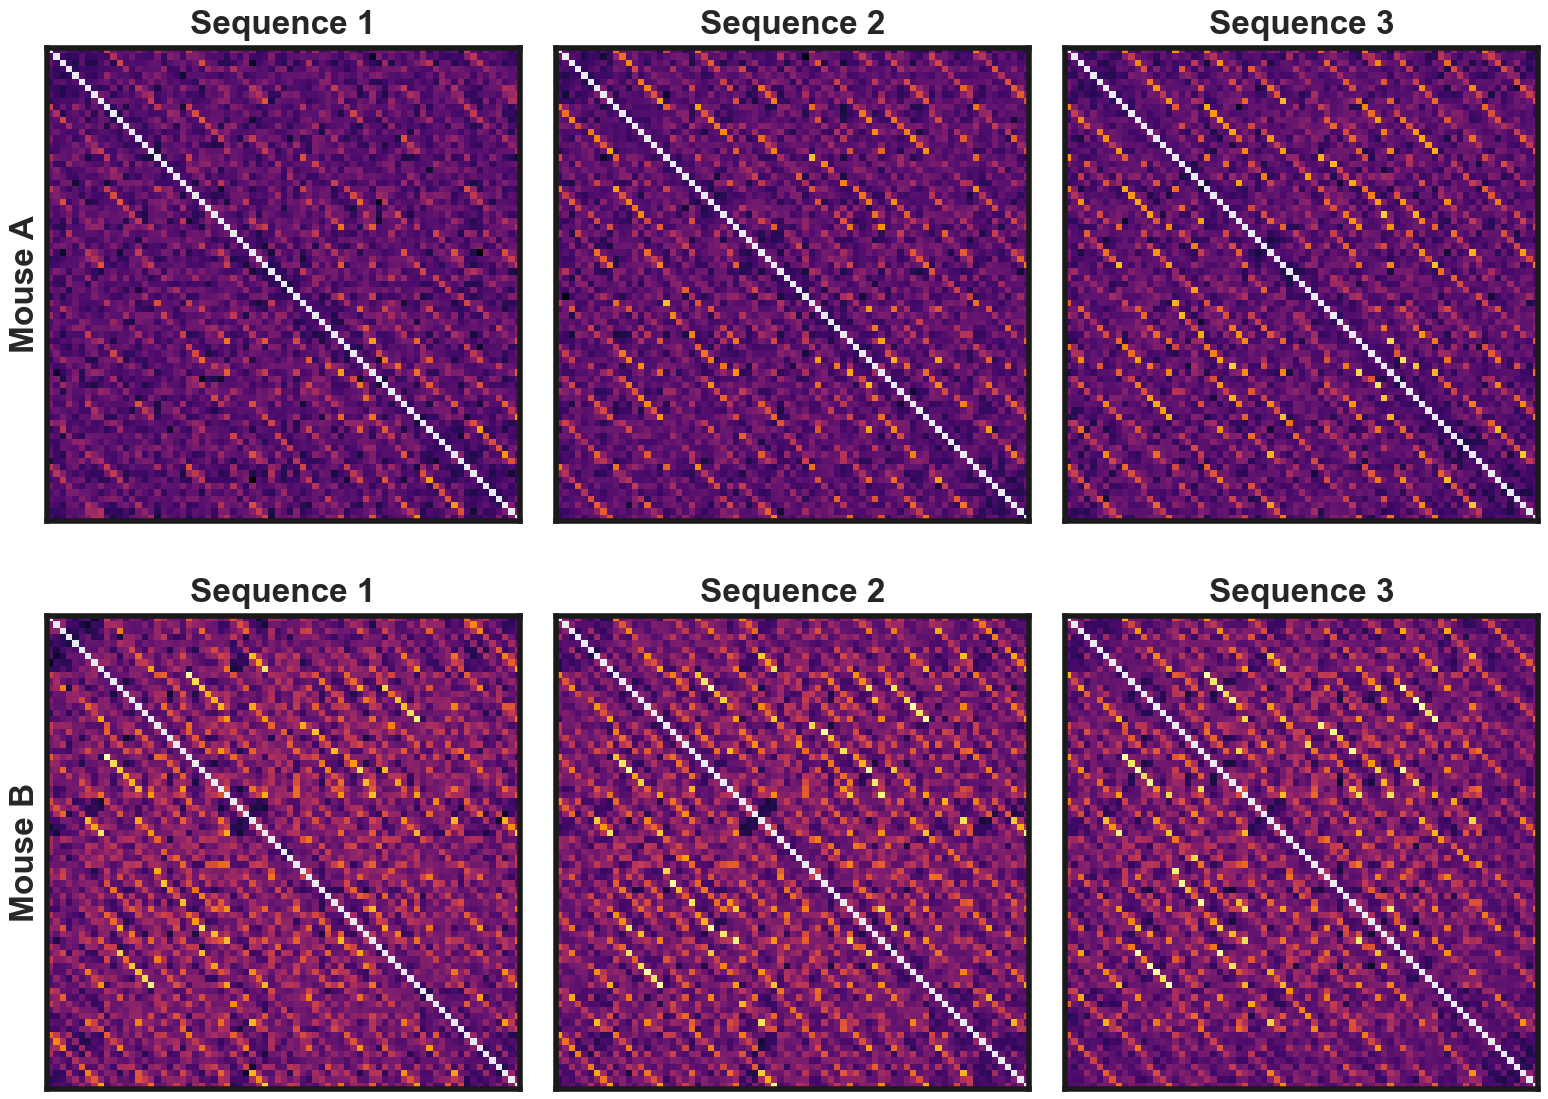

In [37]:
fig_e = plot_rsm_parts_examples(rsm_parts_ordered, 0, 2)

In [26]:
# plot animal-wise similarity in each sequence and decode rsm within and across animals
df_animal_similarity, df_animal_ID, df_animals, df_sequences = predict_rsm_animals(animals)


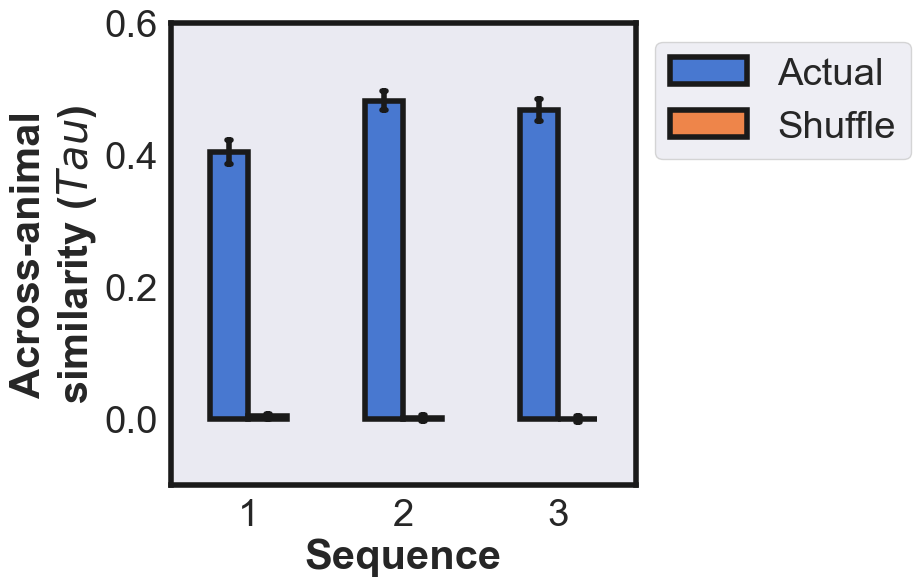

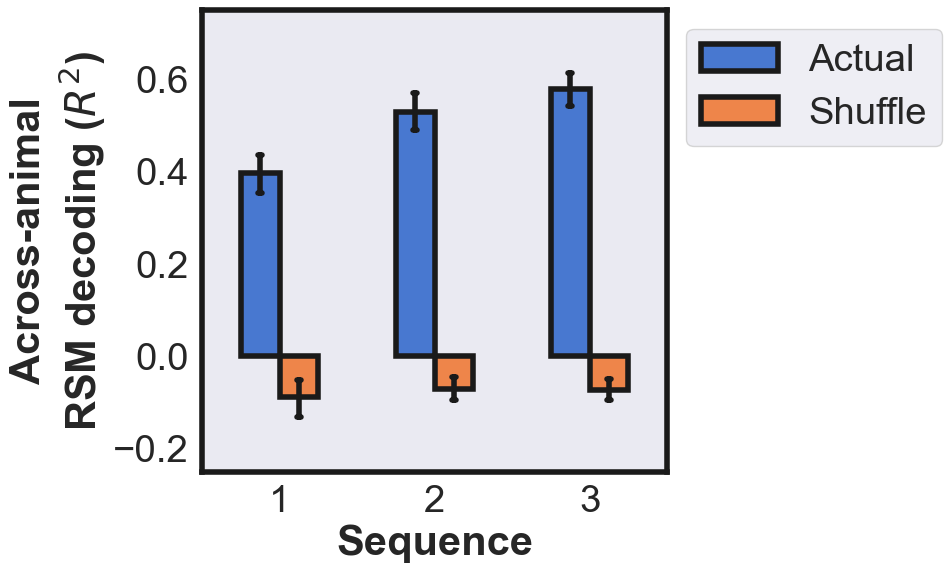

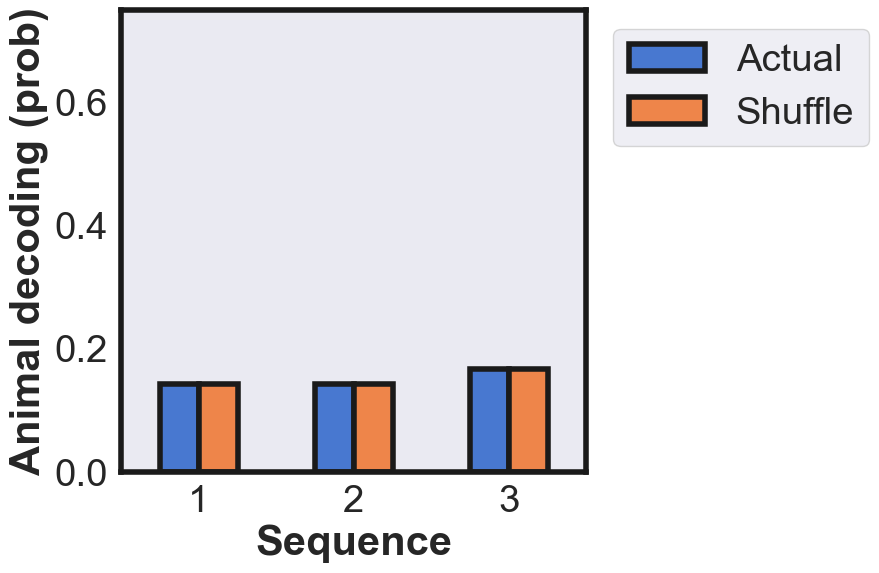

In [37]:
sns.set(font_scale=2.5, palette='muted', style='dark')
fig_f = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.barplot(data=df_animal_similarity, x='Sequence', y='Fit', hue='Data', edgecolor='k', width=.5,
                    saturation=1.,
                    linewidth=4, errcolor='k', errwidth=4, capsize=.05, palette="muted")
ax.set_ylabel('Across-animal\nsimilarity ($Tau$)', weight='bold')
ax.set_xlabel('Sequence', weight='bold')
ax.set_xticklabels(['1', '2', '3'])
ax.set_ylim([-.1, .6])
plt.setp(ax.spines.values(), color='k', linewidth=4)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

fig_h = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.barplot(data=df_animals, x='Sequence', y='Decoding Accuracy', hue='Data', edgecolor='k', width=.5, saturation=1.,
                linewidth=4, errcolor='k', errwidth=4, capsize=.05, palette="muted")
ax.set_ylabel('Across-animal\nRSM decoding ($R^2$)', weight='bold')
ax.set_ylim([-.25, .75])
ax.set_xlabel('Sequence', weight='bold')
ax.set_xticklabels(['1', '2', '3'])
plt.setp(ax.spines.values(), color='k', linewidth=4)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

fig_i = plt.figure(figsize=(6,6))
ax = plt.subplot()
sns.barplot(data=df_animal_ID, x='Sequence', y='Correct', hue='Data', edgecolor='k', width=.5, saturation=1.,
                linewidth=4, errcolor='k', errwidth=4, capsize=.05, errorbar=None, palette="muted")
ax.set_ylabel('Animal decoding (prob)', weight='bold')
ax.set_ylim([0, .75])
ax.set_xlabel('Sequence', weight='bold')
ax.set_xticklabels(['1', '2', '3'])
plt.setp(ax.spines.values(), color='k', linewidth=4)
plt.legend(bbox_to_anchor=(1.65,1.))
plt.show()


Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:12<00:00,  6.56s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:11<00:00,  6.48s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:06<00:00,  6.02s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:05<00:00,  5.99s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:05<00:00,  5.99s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:05<00:00,  6.00s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:08<00:00,  6.21s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:13<00:00,  6.72s/it]
Fitting rsm across animals with downsampling of cell numbers: 100%|██████████| 11/11 [01:14<00:00,  6.73s/it]
Fitting rs

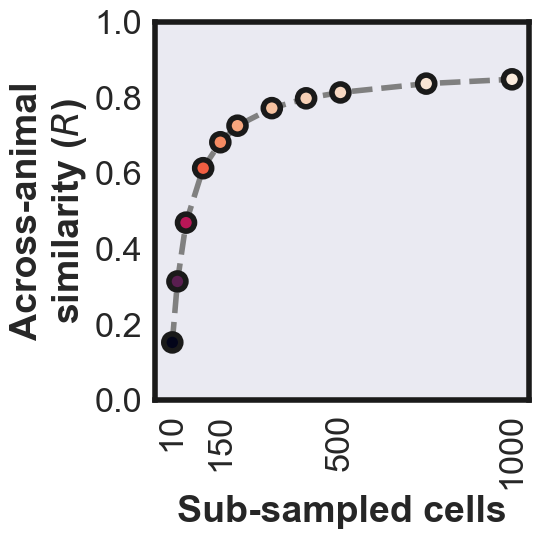

In [14]:
# Figure 2g
# How correlated are RSMs when we build the average from diff numbers of cells? downsample to match rand cells across
n_samples = [10, 25, 50, 100, 150, 200, 300, 400, 500, 750, 1000]
n_reps = 10
rsm_fits_dscells = np.zeros([len(n_samples) * len(animals)**2 * n_reps, 5]) * np.nan
c = 0
for k in range(n_reps):
    for n in tqdm(n_samples, desc="Fitting rsm across animals with downsampling of cell numbers",
                  position=0, leave=True):
        for a1, animal1 in enumerate(animals):
            for a2, animal2 in enumerate(animals):
                a1_n_cells, a2_n_cells = (rsm_parts_animals[animal1]["rsm"].shape[-1],
                                          rsm_parts_animals[animal2]["rsm"].shape[-1])
                cell_idx1, cell_idx2 = (np.random.choice(np.arange(a1_n_cells), n, replace=True),
                                        np.random.choice(np.arange(a2_n_cells), n, replace=True))
                rsm_a1, rsm_a2 = (rsm_parts_animals[animal1]["rsm"][:, :, :, cell_idx1],
                                  rsm_parts_animals[animal2]["rsm"][:, :, :, cell_idx2])
                rsm_a1, rsm_a2 = (np.nanmean(np.nanmean(rsm_a1, axis=0), axis=-1),
                                  np.nanmean(np.nanmean(rsm_a2, axis=0), axis=-1))
                rsm_a1, rsm_a2 = (rsm_a1[np.tri(rsm_a1.shape[0], k=-1).astype(bool)],
                                  rsm_a2[np.tri(rsm_a2.shape[0], k=-1).astype(bool)])
                nan_mask = ~np.isnan(rsm_a1 + rsm_a2)
                r = pearsonr(rsm_a1[nan_mask], rsm_a2[nan_mask])[0]
                rsm_fits_dscells[c, :] = np.hstack((a1, a2, n, k, r))
                c += 1

df = pd.DataFrame(data=rsm_fits_dscells, columns=["Animal 1", "Animal 2", "N cells", "Rep", "R"])
df.groupby("N cells").mean()

sns.set(style="dark", font_scale=2.25)
fig_g = plt.figure(figsize=(6, 6))
ax = plt.subplot()
# sns.barplot(data=df, x="N cells", y="R", estimator="mean", errorbar="se")
sns.lineplot(data=df.groupby("N cells").mean(), x="N cells", y="R",
             color="gray", linestyle="--", linewidth=4., zorder=0)
sns.scatterplot(data=df.groupby("N cells").mean(), x="N cells", y="R",
                s=150, c=df.groupby("N cells").mean()["R"], edgecolor="k",
                linewidth=4., zorder=1)
ax.set_ylim([0, 1.])
ax.set_xticks(n_samples[::4] + [1000])
ax.set_xticklabels(n_samples[::4] + [1000], rotation=90)
ax.set_ylabel("Across-animal\nsimilarity ($R$)", weight="bold")
ax.set_xlabel("Sub-sampled cells", weight="bold")
plt.setp(ax.spines.values(), color="k", linewidth=4.)
plt.tight_layout()
plt.show()